In [1]:
%matplotlib inline


# Single-axis tracking

Examples of modeling tilt angles for single-axis tracker arrays.


This example shows basic usage of pvlib's tracker position calculations with
:py:meth:`pvlib.tracking.singleaxis`.  The examples shown here demonstrate
how the tracker parameters affect the generated tilt angles.

Because tracker angle is based on where the sun is in the sky, calculating
solar position is always the first step.

## True-tracking

The basic tracking algorithm is called "true-tracking". It orients the panels
towards the sun as much as possible in order to maximize the cross section
presented towards incoming beam irradiance.



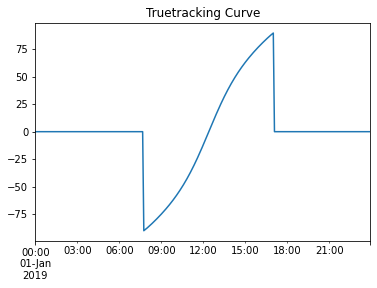

In [2]:
from pvlib import solarposition, tracking
import pandas as pd
import matplotlib.pyplot as plt

tz = 'US/Eastern'
lat, lon = 40, -80

times = pd.date_range('2019-01-01', '2019-01-02', closed='left', freq='5min',
                      tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)

truetracking_angles = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=0,
    axis_azimuth=180,
    max_angle=90,
    backtrack=False,  # for true-tracking
    gcr=0.5)  # irrelevant for true-tracking

truetracking_position = truetracking_angles['tracker_theta'].fillna(0)
truetracking_position.plot(title='Truetracking Curve')

plt.show()

## Backtracking

Because truetracking yields steep tilt angle in morning and afternoon, it
will cause row to row shading as the shadows from adjacent rows fall on each
other. To prevent this, the trackers can rotate backwards when the sun is
near the horizon -- "backtracking".  The shading angle depends on row
geometry, so the gcr parameter must be specified.  The greater the gcr, the
tighter the row spacing and the more aggressively the array must backtrack.



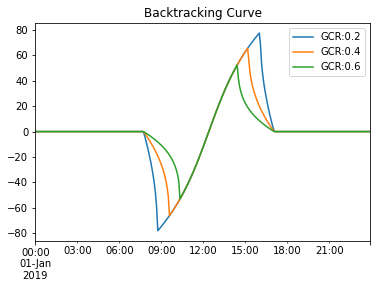

In [3]:
fig, ax = plt.subplots()

for gcr in [0.2, 0.4, 0.6]:
    backtracking_angles = tracking.singleaxis(
        apparent_zenith=solpos['apparent_zenith'],
        apparent_azimuth=solpos['azimuth'],
        axis_tilt=0,
        axis_azimuth=180,
        max_angle=90,
        backtrack=True,
        gcr=gcr)

    backtracking_position = backtracking_angles['tracker_theta'].fillna(0)
    backtracking_position.plot(title='Backtracking Curve',
                               label=f'GCR:{gcr:0.01f}',
                               ax=ax)

plt.legend()
plt.show()